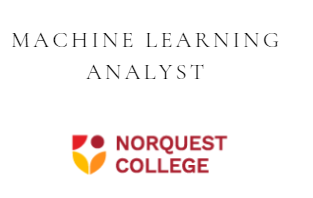

[Link to form](https://docs.google.com/forms/d/1tExBK8RlcBqLLrZCo3IHKlwma2-6qCb66uOJHLT81LM/edit)

[Link to Dataset](https://docs.google.com/spreadsheets/d/1wRp72PgJDvbbyOS5IXtlnCC_0xv6sRbX0dhJmX_Bos0/edit?resourcekey#gid=1842242084)

Before performing any data analysis and exploratory data analysis (EDA), we need to clean and preprocess the dataset. The dataset contains some columns with similar information and others that may not be relevant for analysis. We'll first clean the dataset and then perform EDA.

Here are the steps we'll follow:

**Data Cleaning:**

Remove duplicate and irrelevant columns.

Handle missing values.

Convert data types if necessary.

Rename columns for clarity.

**Exploratory Data Analysis (EDA):**

Summary statistics.

Distribution of numerical variables.

Count of categorical variables.

Visualization (e.g., bar plots, histograms, box plots).


# Data Cleaning


In [14]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:

# # Load the dataset (replace with your actual dataset)
# data = pd.read_csv('Proposed Data Collection.csv')

In [16]:
# Load the dataset with a specified encoding
data = pd.read_csv('Food Drive Data Collection 2024(1-448).csv', encoding='latin1')
data_2 = pd.read_csv('Property_Assessment_Data__Current_Calendar_Year__20240925.csv', encoding='latin1')


In [17]:
data.head()

,ï»¿ID,Start time,Completion time,Email,Name,How did you receive the form?,Email address,Drop Off Location,Other Drop-off Locations,Stake,...,# of Donation Bags Collected,Did you complete more than 1 route?,How many routes did you complete?,Additional Routes completed (2 routes),Additional routes completed (3 routes),Additional routes completed (3 routes)2,Additional routes completed (More than 3 Routes),Additional routes completed (More than 3 Routes)2,Additional routes completed (More than 3 Routes)3,Comments or Feedback
0,25,9-28-24 10:01:37,9-28-24 10:05:20,anonymous,NaN,In person,NaN,Londonberry Chapel,NaN,Bonnie Doon Stake,...,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26,9-28-24 10:31:19,9-28-24 10:34:00,anonymous,NaN,In person,NaN,Gateway Stake Centre,NaN,Gateway Stake,...,20,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27,9-28-24 10:33:28,9-28-24 10:36:55,anonymous,NaN,In person,NaN,Bonnie Doon Stake Centre,NaN,Bonnie Doon Stake,...,15,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,9-28-24 10:41:03,9-28-24 10:43:06,anonymous,NaN,In person,NaN,Bearspaw Chapel,NaN,Gateway Stake,...,25,Yes,2,2,NaN,NaN,NaN,NaN,NaN,NaN
4,29,9-28-24 10:36:33,9-28-24 10:45:31,anonymous,NaN,In person,Golosrocks@gmail.com,Gateway Stake Centre,NaN,Gateway Stake,...,21,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 26 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   ï»¿ID                                                  446 non-null    int64  
 1   Start time                                             446 non-null    object 
 2   Completion time                                        446 non-null    object 
 3   Email                                                  446 non-null    object 
 4   Name                                                   0 non-null      float64
 5   How did you receive the form?                          446 non-null    object 
 6   Email address                                          192 non-null    object 
 7   Drop Off Location                                      446 non-null    object 
 8   Other Drop-off Locations                          

Ward/Branch had multiple columns, edit and add all to one column

In [19]:
# Remove duplicate and irrelevant columns. Email Address occurs twice in columns 1 & 12
data = data.drop(columns=['Name', 'Email', 'Email address', 'Comments or Feedback', 'Other Drop-off Locations'])


In [20]:
data.head()

,ï»¿ID,Start time,Completion time,How did you receive the form?,Drop Off Location,Stake,Ward/Branch,Route Number/Name,Time Spent Collecting Donations,# of Adult Volunteers who participated in this route,...,# of Doors in Route,# of Donation Bags Collected,Did you complete more than 1 route?,How many routes did you complete?,Additional Routes completed (2 routes),Additional routes completed (3 routes),Additional routes completed (3 routes)2,Additional routes completed (More than 3 Routes),Additional routes completed (More than 3 Routes)2,Additional routes completed (More than 3 Routes)3
0,25,9-28-24 10:01:37,9-28-24 10:05:20,In person,Londonberry Chapel,Bonnie Doon Stake,Clareview Ward,Unassigned,0 - 30 Minutes,1,...,1,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26,9-28-24 10:31:19,9-28-24 10:34:00,In person,Gateway Stake Centre,Gateway Stake,Lee Ridge Ward,50,0 - 30 Minutes,2,...,20,20,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27,9-28-24 10:33:28,9-28-24 10:36:55,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,Forest Heights Ward,98,0 - 30 Minutes,2,...,20,15,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,9-28-24 10:41:03,9-28-24 10:43:06,In person,Bearspaw Chapel,Gateway Stake,Lee Ridge Ward,6,30 - 60 Minutes,2,...,144,25,Yes,2,2,NaN,NaN,NaN,NaN,NaN
4,29,9-28-24 10:36:33,9-28-24 10:45:31,In person,Gateway Stake Centre,Gateway Stake,Silver Berry Ward,19,30 - 60 Minutes,1,...,230,21,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Display basic information about the dataset again
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   ï»¿ID                                                  446 non-null    int64 
 1   Start time                                             446 non-null    object
 2   Completion time                                        446 non-null    object
 3   How did you receive the form?                          446 non-null    object
 4   Drop Off Location                                      446 non-null    object
 5   Stake                                                  446 non-null    object
 6   Ward/Branch                                            446 non-null    object
 7   Route Number/Name                                      446 non-null    object
 8   Time Spent Collecting Donations                        446 n

In [22]:
# Get Time Spent

# Convert the "The time you started at" and "The time you ended at" columns to datetime objects
data['Start time'] = pd.to_datetime(data['Start time'])
data['Completion time'] = pd.to_datetime(data['Completion time'])


<ipython-input-22-59c7f38c9c85>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Start time'] = pd.to_datetime(data['Start time'])
<ipython-input-22-59c7f38c9c85>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Completion time'] = pd.to_datetime(data['Completion time'])


In [23]:
data.head()

,ï»¿ID,Start time,Completion time,How did you receive the form?,Drop Off Location,Stake,Ward/Branch,Route Number/Name,Time Spent Collecting Donations,# of Adult Volunteers who participated in this route,...,# of Doors in Route,# of Donation Bags Collected,Did you complete more than 1 route?,How many routes did you complete?,Additional Routes completed (2 routes),Additional routes completed (3 routes),Additional routes completed (3 routes)2,Additional routes completed (More than 3 Routes),Additional routes completed (More than 3 Routes)2,Additional routes completed (More than 3 Routes)3
0,25,2024-09-28 10:01:37,2024-09-28 10:05:20,In person,Londonberry Chapel,Bonnie Doon Stake,Clareview Ward,Unassigned,0 - 30 Minutes,1,...,1,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26,2024-09-28 10:31:19,2024-09-28 10:34:00,In person,Gateway Stake Centre,Gateway Stake,Lee Ridge Ward,50,0 - 30 Minutes,2,...,20,20,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27,2024-09-28 10:33:28,2024-09-28 10:36:55,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,Forest Heights Ward,98,0 - 30 Minutes,2,...,20,15,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28,2024-09-28 10:41:03,2024-09-28 10:43:06,In person,Bearspaw Chapel,Gateway Stake,Lee Ridge Ward,6,30 - 60 Minutes,2,...,144,25,Yes,2,2,NaN,NaN,NaN,NaN,NaN
4,29,2024-09-28 10:36:33,2024-09-28 10:45:31,In person,Gateway Stake Centre,Gateway Stake,Silver Berry Ward,19,30 - 60 Minutes,1,...,230,21,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   ï»¿ID                                                  446 non-null    int64         
 1   Start time                                             446 non-null    datetime64[ns]
 2   Completion time                                        446 non-null    datetime64[ns]
 3   How did you receive the form?                          446 non-null    object        
 4   Drop Off Location                                      446 non-null    object        
 5   Stake                                                  446 non-null    object        
 6   Ward/Branch                                            446 non-null    object        
 7   Route Number/Name                                      446 non-null    

In [25]:
data['How many routes did you complete?'] = pd.to_numeric(data['How many routes did you complete?'], errors='coerce')

In [26]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
ï»¿ID                                                       0
Start time                                                  0
Completion time                                             0
How did you receive the form?                               0
Drop Off Location                                           0
Stake                                                       0
Ward/Branch                                                 0
Route Number/Name                                           0
Time Spent Collecting Donations                             0
# of Adult Volunteers who participated in this route        0
# of Youth Volunteers who participated in this route\n      0
# of Doors in Route                                         0
# of Donation Bags Collected                                0
Did you complete more than 1 route?                         0
How many routes did you complete?                         330
Additional Routes completed (2 routes)               

In [27]:

# Rename columns for clarity
data = data.rename(columns={
    'Drop Off Location': 'Location',
    'Route Number/Name': 'Route',
    '# of Adult Volunteers who participated in this route': '# of Adult Volunteers',
    '# of Youth Volunteers who participated in this route\n': '# of Youth Volunteers',
    '# of Donation Bags Collected': 'Donation Bags Collected',
    'Did you complete more than 1 route?': 'Completed More Than One Route',
    'How many routes did you complete?': 'Routes Completed',
    '# of Doors in Route': 'Doors in Route'
})


In [28]:
# Print the dtypes for each column
data.dtypes

,0
ï»¿ID,int64
Start time,datetime64[ns]
Completion time,datetime64[ns]
How did you receive the form?,object
Location,object
Stake,object
Ward/Branch,object
Route,object
Time Spent Collecting Donations,object
# of Adult Volunteers,int64


If errors like this pop up:
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
.....

ValueError: invalid literal for int() with base 10: 'Two'
You might need to do a search of the erroneous word in the dataset and replace with values.

Reupload the dataset and rerun.

In [29]:
# Convert columns to the right data types
data['Routes Completed'] = data['Routes Completed'].fillna(1).astype(int)
data['Time Spent Collecting Donations'] = data['Time Spent Collecting Donations'].astype('category')

In [30]:
data["Time Spent Collecting Donations"].unique()

['0 - 30 Minutes', '30 - 60 Minutes', '1 Hour - 1.5 Hours', '2+ Hours']
Categories (4, object): ['0 - 30 Minutes', '1 Hour - 1.5 Hours', '2+ Hours', '30 - 60 Minutes']

In [31]:
data['Time Spent Collecting Donations'] = pd.Categorical(data["Time Spent Collecting Donations"])

In [32]:
data['How did you receive the form?'] = pd.Categorical(data["How did you receive the form?"])
data['Stake']=pd.Categorical(data['Stake'])
data['Ward/Branch']= pd.Categorical(data["Ward/Branch"])
data['Location'] =pd.Categorical(data["Location"])


In [33]:
data['Completed More Than One Route'] = data['Completed More Than One Route'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)
# data['Completed More Than One Route'] = data['Completed More Than One Route'].astype(str)
print(data.dtypes)



ï»¿ID                                                         int64
Start time                                           datetime64[ns]
Completion time                                      datetime64[ns]
How did you receive the form?                              category
Location                                                   category
Stake                                                      category
Ward/Branch                                                category
Route                                                        object
Time Spent Collecting Donations                            category
# of Adult Volunteers                                         int64
# of Youth Volunteers                                         int64
Doors in Route                                                int64
Donation Bags Collected                                       int64
Completed More Than One Route                                 int64
Routes Completed                                

In [34]:
data.head()

,ï»¿ID,Start time,Completion time,How did you receive the form?,Location,Stake,Ward/Branch,Route,Time Spent Collecting Donations,# of Adult Volunteers,...,Doors in Route,Donation Bags Collected,Completed More Than One Route,Routes Completed,Additional Routes completed (2 routes),Additional routes completed (3 routes),Additional routes completed (3 routes)2,Additional routes completed (More than 3 Routes),Additional routes completed (More than 3 Routes)2,Additional routes completed (More than 3 Routes)3
0,25,2024-09-28 10:01:37,2024-09-28 10:05:20,In person,Londonberry Chapel,Bonnie Doon Stake,Clareview Ward,Unassigned,0 - 30 Minutes,1,...,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,26,2024-09-28 10:31:19,2024-09-28 10:34:00,In person,Gateway Stake Centre,Gateway Stake,Lee Ridge Ward,50,0 - 30 Minutes,2,...,20,20,0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,27,2024-09-28 10:33:28,2024-09-28 10:36:55,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,Forest Heights Ward,98,0 - 30 Minutes,2,...,20,15,0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,28,2024-09-28 10:41:03,2024-09-28 10:43:06,In person,Bearspaw Chapel,Gateway Stake,Lee Ridge Ward,6,30 - 60 Minutes,2,...,144,25,1,2,2,NaN,NaN,NaN,NaN,NaN
4,29,2024-09-28 10:36:33,2024-09-28 10:45:31,In person,Gateway Stake Centre,Gateway Stake,Silver Berry Ward,19,30 - 60 Minutes,1,...,230,21,0,1,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [35]:
data.describe()

,ï»¿ID,Start time,Completion time,# of Adult Volunteers,# of Youth Volunteers,Doors in Route,Donation Bags Collected,Completed More Than One Route,Routes Completed
count,446.000000,446,446,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,247.500000,2024-09-04 13:00:36.345291776,2024-09-04 13:06:38.529147904,2.073991,1.887892,181.636771,32.713004,0.284753,1.316143
min,25.000000,2010-01-24 06:46:00,2010-01-24 06:53:00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,136.250000,2024-09-28 11:27:47.249999872,2024-09-28 11:32:13,2.000000,0.000000,101.750000,18.000000,0.000000,1.000000
50%,247.500000,2024-09-28 11:55:44,2024-09-28 12:00:30.500000,2.000000,1.000000,159.500000,25.000000,0.000000,1.000000
75%,358.750000,2024-09-28 12:35:18,2024-09-28 12:39:17.500000,2.000000,2.000000,215.000000,40.000000,1.000000,2.000000
max,470.000000,2024-09-30 22:28:55,2024-09-30 22:32:37,6.000000,165.000000,1751.000000,500.000000,1.000000,3.000000
std,128.893367,NaN,NaN,0.917444,7.917325,155.948098,33.901154,0.451804,0.573622


In [36]:
Q1 = data['Donation Bags Collected'].quantile(0.25)
Q3 = data['Donation Bags Collected'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (data['Donation Bags Collected'] < lower_bound) | (data['Donation Bags Collected'] > upper_bound)
outlier_values = data[outliers]['Donation Bags Collected']
print(outlier_values)

125    250
137    230
147    500
220    100
252     80
285     75
286     80
289    150
291     75
297    100
301    118
334     80
358     95
371    123
380    100
396    133
400    200
422    100
440    100
Name: Donation Bags Collected, dtype: int64


In [37]:
num_outliers = outliers.sum()
print(f"Number of outliers: {num_outliers}")

Number of outliers: 19


In [38]:
mean = data['Donation Bags Collected'].mean()
data['Donation Bags Collected'][(data['Donation Bags Collected'] >= 230)] = mean

<ipython-input-38-ee12139e2790>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Donation Bags Collected'][(data['Donation Bags Collected'] >= 230)] = mean
<ipython-input-38-ee12139e2790>:2: SettingWithCopyWarning: 
A value is trying t

In [39]:
Q1 = data['# of Youth Volunteers'].quantile(0.25)
Q3 = data['# of Youth Volunteers'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_2 = (data['# of Youth Volunteers'] < lower_bound) | (data['# of Youth Volunteers'] > upper_bound)
outlier_values = data[outliers_2]['# of Youth Volunteers']
print(outlier_values)
num_outliers = outliers_2.sum()
print(f"Number of outliers: {num_outliers}")

57     165
77      10
236      6
250      8
257      9
279      9
358     10
Name: # of Youth Volunteers, dtype: int64
Number of outliers: 7


In [40]:
mean = data['# of Youth Volunteers'].mean()
data['# of Youth Volunteers'][(data['# of Youth Volunteers'] > 10)] = mean

<ipython-input-40-f76805adc86f>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['# of Youth Volunteers'][(data['# of Youth Volunteers'] > 10)] = mean
<ipython-input-40-f76805adc86f>:2: SettingWithCopyWarning: 
A value is trying to be s

In [41]:
data.dtypes

,0
ï»¿ID,int64
Start time,datetime64[ns]
Completion time,datetime64[ns]
How did you receive the form?,category
Location,category
Stake,category
Ward/Branch,category
Route,object
Time Spent Collecting Donations,category
# of Adult Volunteers,int64


In [42]:
data['# of Youth Volunteers'] = data['# of Youth Volunteers'].astype(int)
data['Donation Bags Collected'] = data['Donation Bags Collected'].astype(int)

In [43]:
data.dtypes

,0
ï»¿ID,int64
Start time,datetime64[ns]
Completion time,datetime64[ns]
How did you receive the form?,category
Location,category
Stake,category
Ward/Branch,category
Route,object
Time Spent Collecting Donations,category
# of Adult Volunteers,int64


In [44]:
data.to_csv('cleaned_data.csv', index=False)

In [45]:
data_2 = data_2.drop(['Suite', 'House Number', 'Street Name', 'Account Number','Garage', 'Neighbourhood ID','Point Location','Assessment Class % 1','Assessment Class % 2','Assessment Class % 3','Assessment Class 1','Assessment Class 2','Assessment Class 3'], axis=1)


In [46]:
data_2.head(50)

,Neighbourhood,Ward,Assessed Value,Latitude,Longitude
0,MEADOWLARK PARK,sipiwiyiniwak Ward,336000,53.522497,-113.597974
1,STRATHEARN,MÃ©tis Ward,49836000,53.530949,-113.469279
2,RIO TERRACE,sipiwiyiniwak Ward,669500,53.507872,-113.580945
3,RAMSAY HEIGHTS,pihÃªsiwin Ward,268500,53.484560,-113.581913
4,LAGO LINDO,tastawiyiniwak Ward,358500,53.636637,-113.485140
5,LAGO LINDO,tastawiyiniwak Ward,423500,53.630707,-113.489259
6,GLENWOOD,Nakota Isga Ward,1718000,53.539599,-113.611600
7,INDUSTRIAL HEIGHTS,MÃ©tis Ward,1580500,53.582762,-113.434404
8,OLIVER,O-day'min Ward,78500,53.542162,-113.530183
9,BRITANNIA YOUNGSTOWN,Nakota Isga Ward,155000,53.547672,-113.610514


In [47]:
missing_assessed_values = data_2['Assessed Value'].isnull().sum()
print(f"Number of missing Assessed Values: {missing_assessed_values}")

Number of missing Assessed Values: 0


In [48]:
data['Neighbourhood'] = data['Ward/Branch'].apply(lambda x: x.split(' Ward')[0])


data.head()

,ï»¿ID,Start time,Completion time,How did you receive the form?,Location,Stake,Ward/Branch,Route,Time Spent Collecting Donations,# of Adult Volunteers,...,Donation Bags Collected,Completed More Than One Route,Routes Completed,Additional Routes completed (2 routes),Additional routes completed (3 routes),Additional routes completed (3 routes)2,Additional routes completed (More than 3 Routes),Additional routes completed (More than 3 Routes)2,Additional routes completed (More than 3 Routes)3,Neighbourhood
0,25,2024-09-28 10:01:37,2024-09-28 10:05:20,In person,Londonberry Chapel,Bonnie Doon Stake,Clareview Ward,Unassigned,0 - 30 Minutes,1,...,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,Clareview
1,26,2024-09-28 10:31:19,2024-09-28 10:34:00,In person,Gateway Stake Centre,Gateway Stake,Lee Ridge Ward,50,0 - 30 Minutes,2,...,20,0,1,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge
2,27,2024-09-28 10:33:28,2024-09-28 10:36:55,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,Forest Heights Ward,98,0 - 30 Minutes,2,...,15,0,1,NaN,NaN,NaN,NaN,NaN,NaN,Forest Heights
3,28,2024-09-28 10:41:03,2024-09-28 10:43:06,In person,Bearspaw Chapel,Gateway Stake,Lee Ridge Ward,6,30 - 60 Minutes,2,...,25,1,2,2,NaN,NaN,NaN,NaN,NaN,Lee Ridge
4,29,2024-09-28 10:36:33,2024-09-28 10:45:31,In person,Gateway Stake Centre,Gateway Stake,Silver Berry Ward,19,30 - 60 Minutes,1,...,21,0,1,NaN,NaN,NaN,NaN,NaN,NaN,Silver Berry


In [49]:
data.shape

(446, 22)

In [50]:
data_2.shape

(426913, 5)

In [51]:
data['Neighbourhood'] = data['Neighbourhood'].str.upper()
data.head()

,ï»¿ID,Start time,Completion time,How did you receive the form?,Location,Stake,Ward/Branch,Route,Time Spent Collecting Donations,# of Adult Volunteers,...,Donation Bags Collected,Completed More Than One Route,Routes Completed,Additional Routes completed (2 routes),Additional routes completed (3 routes),Additional routes completed (3 routes)2,Additional routes completed (More than 3 Routes),Additional routes completed (More than 3 Routes)2,Additional routes completed (More than 3 Routes)3,Neighbourhood
0,25,2024-09-28 10:01:37,2024-09-28 10:05:20,In person,Londonberry Chapel,Bonnie Doon Stake,Clareview Ward,Unassigned,0 - 30 Minutes,1,...,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,CLAREVIEW
1,26,2024-09-28 10:31:19,2024-09-28 10:34:00,In person,Gateway Stake Centre,Gateway Stake,Lee Ridge Ward,50,0 - 30 Minutes,2,...,20,0,1,NaN,NaN,NaN,NaN,NaN,NaN,LEE RIDGE
2,27,2024-09-28 10:33:28,2024-09-28 10:36:55,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,Forest Heights Ward,98,0 - 30 Minutes,2,...,15,0,1,NaN,NaN,NaN,NaN,NaN,NaN,FOREST HEIGHTS
3,28,2024-09-28 10:41:03,2024-09-28 10:43:06,In person,Bearspaw Chapel,Gateway Stake,Lee Ridge Ward,6,30 - 60 Minutes,2,...,25,1,2,2,NaN,NaN,NaN,NaN,NaN,LEE RIDGE
4,29,2024-09-28 10:36:33,2024-09-28 10:45:31,In person,Gateway Stake Centre,Gateway Stake,Silver Berry Ward,19,30 - 60 Minutes,1,...,21,0,1,NaN,NaN,NaN,NaN,NaN,NaN,SILVER BERRY


In [52]:
merged_df = pd.merge(data, data_2, on='Neighbourhood', how='left')  # 'left' to retain the size of the food drive data
merged_df.head()

,ï»¿ID,Start time,Completion time,How did you receive the form?,Location,Stake,Ward/Branch,Route,Time Spent Collecting Donations,# of Adult Volunteers,...,Additional routes completed (3 routes),Additional routes completed (3 routes)2,Additional routes completed (More than 3 Routes),Additional routes completed (More than 3 Routes)2,Additional routes completed (More than 3 Routes)3,Neighbourhood,Ward,Assessed Value,Latitude,Longitude
0,25,2024-09-28 10:01:37,2024-09-28 10:05:20,In person,Londonberry Chapel,Bonnie Doon Stake,Clareview Ward,Unassigned,0 - 30 Minutes,1,...,NaN,NaN,NaN,NaN,NaN,CLAREVIEW,NaN,NaN,NaN,NaN
1,26,2024-09-28 10:31:19,2024-09-28 10:34:00,In person,Gateway Stake Centre,Gateway Stake,Lee Ridge Ward,50,0 - 30 Minutes,2,...,NaN,NaN,NaN,NaN,NaN,LEE RIDGE,Karhiio Ward,28618500.0,53.472321,-113.450288
2,26,2024-09-28 10:31:19,2024-09-28 10:34:00,In person,Gateway Stake Centre,Gateway Stake,Lee Ridge Ward,50,0 - 30 Minutes,2,...,NaN,NaN,NaN,NaN,NaN,LEE RIDGE,Karhiio Ward,161500.0,53.473252,-113.445137
3,26,2024-09-28 10:31:19,2024-09-28 10:34:00,In person,Gateway Stake Centre,Gateway Stake,Lee Ridge Ward,50,0 - 30 Minutes,2,...,NaN,NaN,NaN,NaN,NaN,LEE RIDGE,Karhiio Ward,304500.0,53.468633,-113.448336
4,26,2024-09-28 10:31:19,2024-09-28 10:34:00,In person,Gateway Stake Centre,Gateway Stake,Lee Ridge Ward,50,0 - 30 Minutes,2,...,NaN,NaN,NaN,NaN,NaN,LEE RIDGE,Karhiio Ward,436000.0,53.468781,-113.440824


In [53]:
merged_df.shape

(484840, 26)

In [54]:
property_data_unique = data_2.drop_duplicates(subset='Neighbourhood')
property_data_unique.shape

(403, 5)

In [55]:
merged_df = pd.merge(data, property_data_unique, on='Neighbourhood', how='left')
merged_df.head(50)

,ï»¿ID,Start time,Completion time,How did you receive the form?,Location,Stake,Ward/Branch,Route,Time Spent Collecting Donations,# of Adult Volunteers,...,Additional routes completed (3 routes),Additional routes completed (3 routes)2,Additional routes completed (More than 3 Routes),Additional routes completed (More than 3 Routes)2,Additional routes completed (More than 3 Routes)3,Neighbourhood,Ward,Assessed Value,Latitude,Longitude
0,25,2024-09-28 10:01:37,2024-09-28 10:05:20,In person,Londonberry Chapel,Bonnie Doon Stake,Clareview Ward,Unassigned,0 - 30 Minutes,1,...,NaN,NaN,NaN,NaN,NaN,CLAREVIEW,NaN,NaN,NaN,NaN
1,26,2024-09-28 10:31:19,2024-09-28 10:34:00,In person,Gateway Stake Centre,Gateway Stake,Lee Ridge Ward,50,0 - 30 Minutes,2,...,NaN,NaN,NaN,NaN,NaN,LEE RIDGE,Karhiio Ward,28618500.0,53.472321,-113.450288
2,27,2024-09-28 10:33:28,2024-09-28 10:36:55,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,Forest Heights Ward,98,0 - 30 Minutes,2,...,NaN,NaN,NaN,NaN,NaN,FOREST HEIGHTS,MÃ©tis Ward,837500.0,53.550567,-113.454812
3,28,2024-09-28 10:41:03,2024-09-28 10:43:06,In person,Bearspaw Chapel,Gateway Stake,Lee Ridge Ward,6,30 - 60 Minutes,2,...,NaN,NaN,NaN,NaN,NaN,LEE RIDGE,Karhiio Ward,28618500.0,53.472321,-113.450288
4,29,2024-09-28 10:36:33,2024-09-28 10:45:31,In person,Gateway Stake Centre,Gateway Stake,Silver Berry Ward,19,30 - 60 Minutes,1,...,NaN,NaN,NaN,NaN,NaN,SILVER BERRY,Sspomitapi Ward,162000.0,53.459216,-113.381804
5,30,2024-09-28 10:44:18,2024-09-28 10:46:05,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,Forest Heights Ward,7,0 - 30 Minutes,2,...,NaN,NaN,NaN,NaN,NaN,FOREST HEIGHTS,MÃ©tis Ward,837500.0,53.550567,-113.454812
6,31,2024-09-28 10:34:02,2024-09-28 10:48:52,In person,Gateway Stake Centre,Gateway Stake,Crawford Plains Ward,Meyokumin 25,30 - 60 Minutes,2,...,NaN,NaN,NaN,NaN,NaN,CRAWFORD PLAINS,Sspomitapi Ward,140000.0,53.443419,-113.402610
7,32,2024-09-28 10:02:12,2024-09-28 10:49:10,In person,Londonberry Chapel,Bonnie Doon Stake,Londonderry Ward,32,30 - 60 Minutes,2,...,NaN,NaN,NaN,NaN,NaN,LONDONDERRY,NaN,NaN,NaN,NaN
8,33,2024-09-28 10:46:20,2024-09-28 10:49:36,In person,Riverbend Stake Centre,Riverbend Stake,Woodbend Ward,Route 1,1 Hour - 1.5 Hours,3,...,NaN,NaN,NaN,NaN,NaN,WOODBEND,NaN,NaN,NaN,NaN
9,34,2024-09-28 10:48:20,2024-09-28 10:56:39,In person,Riverbend Stake Centre,Riverbend Stake,Woodbend Ward,2,30 - 60 Minutes,2,...,NaN,NaN,NaN,NaN,NaN,WOODBEND,NaN,NaN,NaN,NaN


In [56]:
print("\nMissing Values:")
print(merged_df.isnull().sum())


Missing Values:
ï»¿ID                                                  0
Start time                                             0
Completion time                                        0
How did you receive the form?                          0
Location                                               0
Stake                                                  0
Ward/Branch                                            0
Route                                                  0
Time Spent Collecting Donations                        0
# of Adult Volunteers                                  0
# of Youth Volunteers                                  0
Doors in Route                                         0
Donation Bags Collected                                0
Completed More Than One Route                          0
Routes Completed                                       0
Additional Routes completed (2 routes)               356
Additional routes completed (3 routes)               421
Additional rou

In [57]:
merged_df.shape

(446, 26)

In [58]:
merged_df.to_csv('Merged_data.csv', index=False)


Text(0.5, 1.0, 'Distribution of Adult Volunteers')

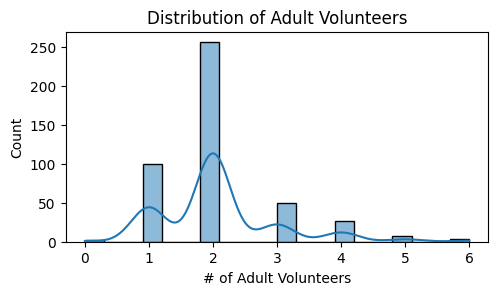

In [59]:
# Visualize the distribution of numerical features
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data['# of Adult Volunteers'], bins=20, kde=True)
plt.title('Distribution of Adult Volunteers')

Text(0.5, 1.0, 'Distribution of Youth Volunteers')

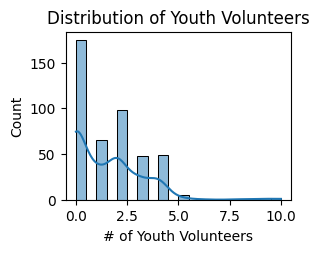

In [60]:
plt.subplot(2, 2, 2)
sns.histplot(data['# of Youth Volunteers'], bins=20, kde=True)
plt.title('Distribution of Youth Volunteers')

Text(0.5, 1.0, 'Distribution of Donation Bags Collected')

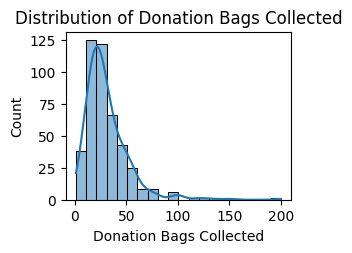

In [61]:
plt.subplot(2, 2, 3)
sns.histplot(data['Donation Bags Collected'], bins=20, kde=True)
plt.title('Distribution of Donation Bags Collected')

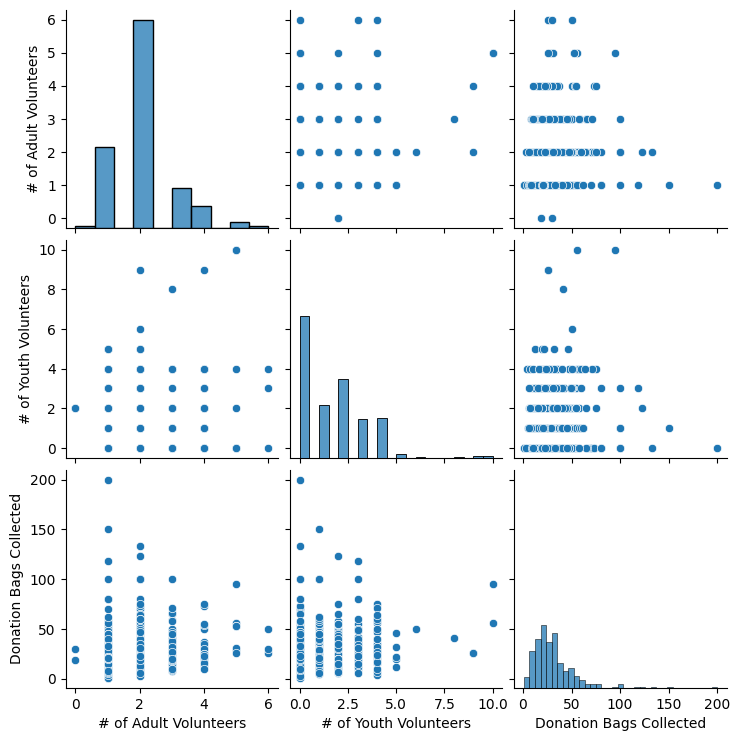

In [62]:
# Visualize relationships between numerical features
sns.pairplot(data[['# of Adult Volunteers', '# of Youth Volunteers', 'Donation Bags Collected']])
plt.show()

In [63]:
# # Visualize relationships between categorical features (if any)
# # Replace 'categorical_column' with your actual categorical column name
# if 'categorical_column' in data.columns:
#     sns.countplot(x='categorical_column', data=data)
#     plt.title('Countplot of Categorical Column')
#     plt.show()


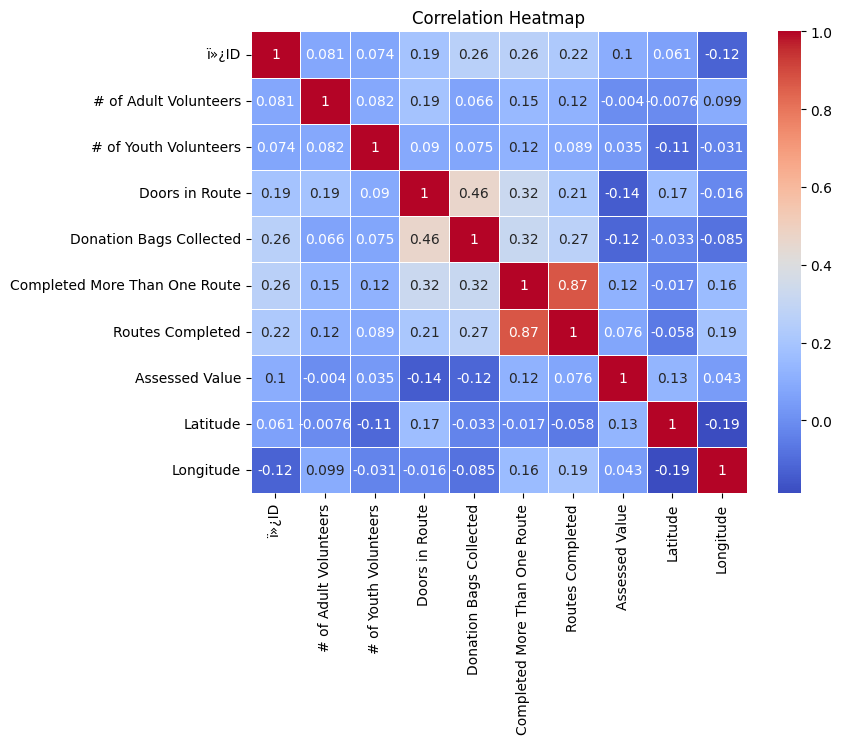

In [64]:
# Correlation heatmap for numerical features
import numpy as np
correlation_matrix = merged_df.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation calculation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

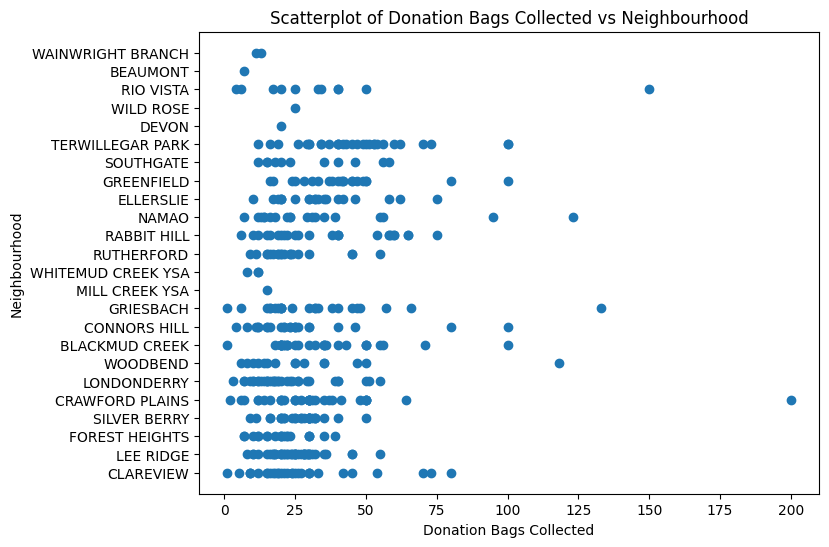

In [65]:
plt.figure(figsize=(8, 6))  # Optional: Set figure size
plt.scatter(data['Donation Bags Collected'], data['Neighbourhood'])
plt.title('Scatterplot of Donation Bags Collected vs Neighbourhood')
plt.xlabel('Donation Bags Collected')
plt.ylabel('Neighbourhood')
plt.show()

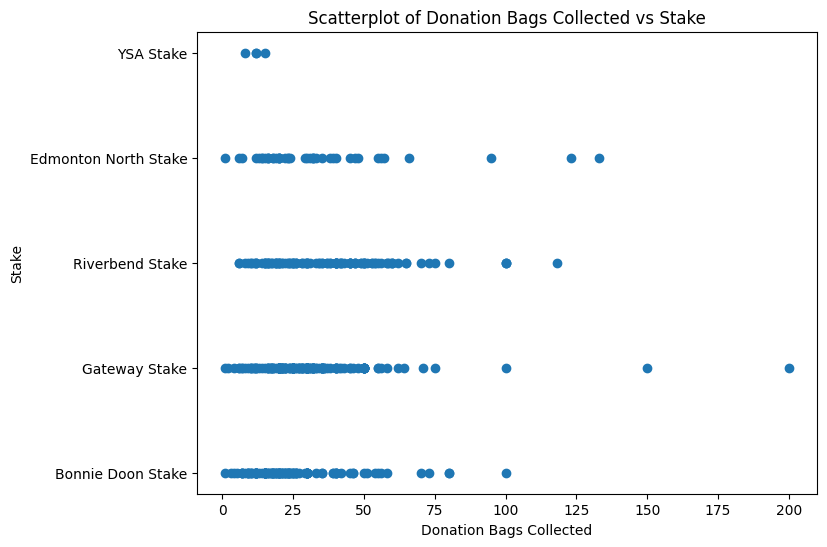

In [66]:
plt.figure(figsize=(8, 6))  # Optional: Set figure size
plt.scatter(data['Donation Bags Collected'], data['Stake'])
plt.title('Scatterplot of Donation Bags Collected vs Stake')
plt.xlabel('Donation Bags Collected')
plt.ylabel('Stake')
plt.show()

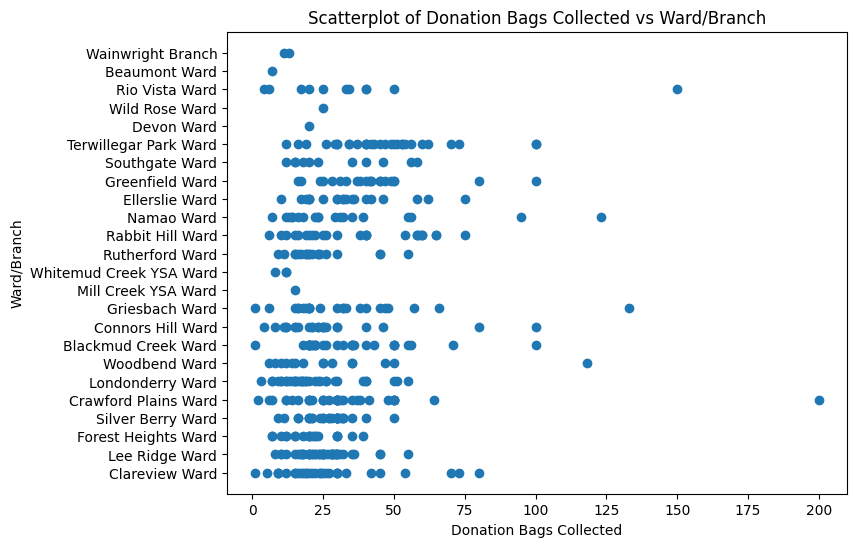

In [67]:
plt.figure(figsize=(8, 6))  # Optional: Set figure size
plt.scatter(data['Donation Bags Collected'], data['Ward/Branch'])
plt.title('Scatterplot of Donation Bags Collected vs Ward/Branch')
plt.xlabel('Donation Bags Collected')
plt.ylabel('Ward/Branch')
plt.show()

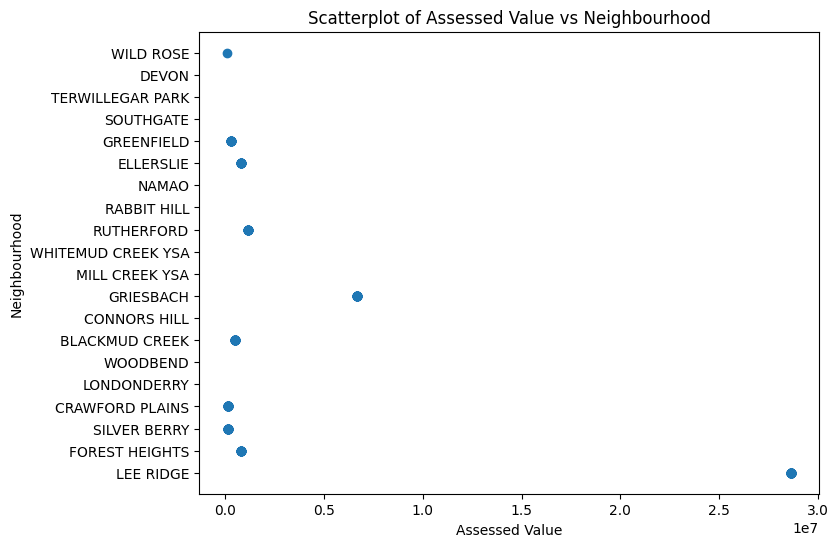

In [68]:
plt.figure(figsize=(8, 6))  # Optional: Set figure size
plt.scatter(merged_df['Assessed Value'], data['Neighbourhood'])
plt.title('Scatterplot of Assessed Value vs Neighbourhood')
plt.xlabel('Assessed Value')
plt.ylabel('Neighbourhood')
plt.show()

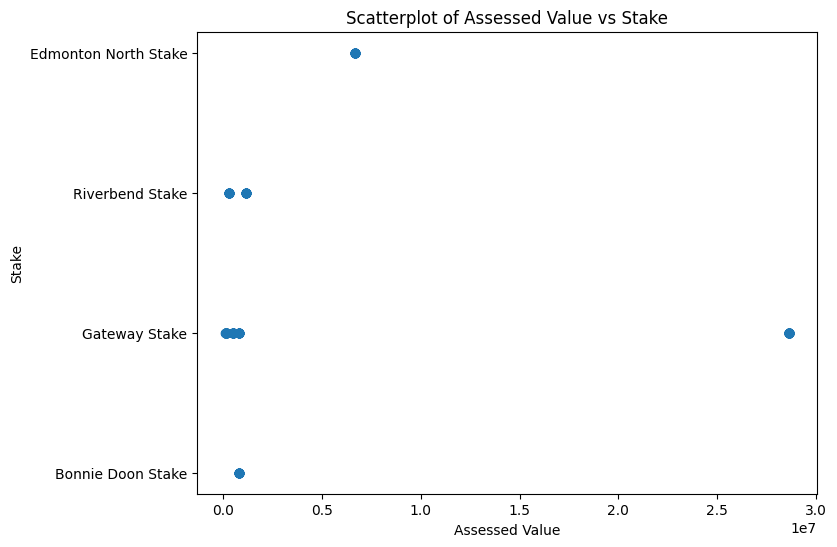

In [69]:
plt.figure(figsize=(8, 6))  # Optional: Set figure size
plt.scatter(merged_df['Assessed Value'], data['Stake'])
plt.title('Scatterplot of Assessed Value vs Stake')
plt.xlabel('Assessed Value')
plt.ylabel('Stake')
plt.show()

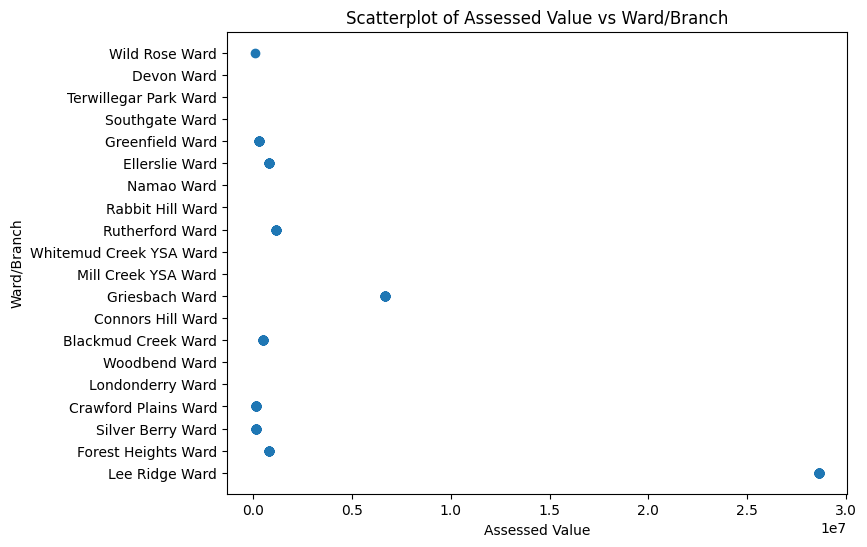

In [70]:
plt.figure(figsize=(8, 6))  # Optional: Set figure size
plt.scatter(merged_df['Assessed Value'], data['Ward/Branch'])
plt.title('Scatterplot of Assessed Value vs Ward/Branch')
plt.xlabel('Assessed Value')
plt.ylabel('Ward/Branch')
plt.show()

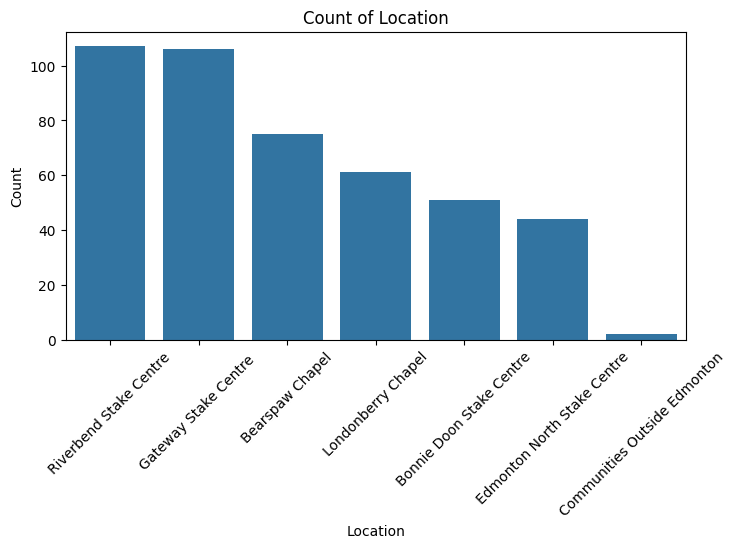

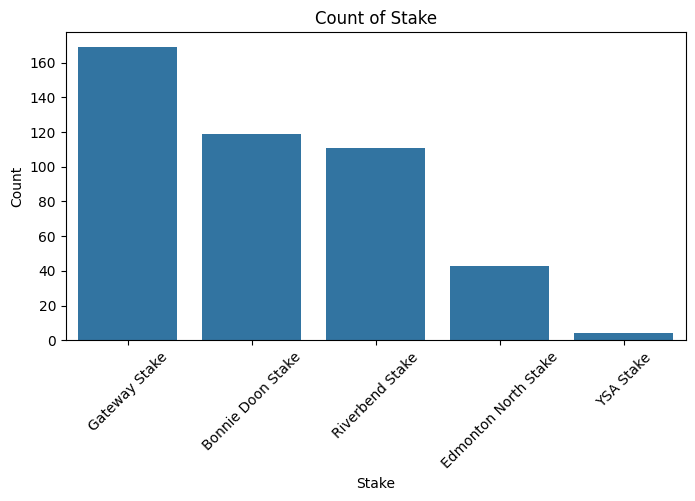

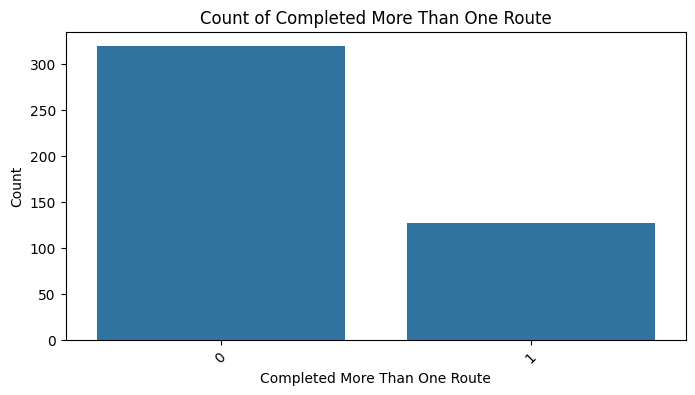

In [71]:
# Count of categorical variables
categorical_columns = ['Location','Stake','Completed More Than One Route']
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

<ipython-input-72-0dc7f9c668a9>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Stake', y='Donation Bags Collected', ci=None)


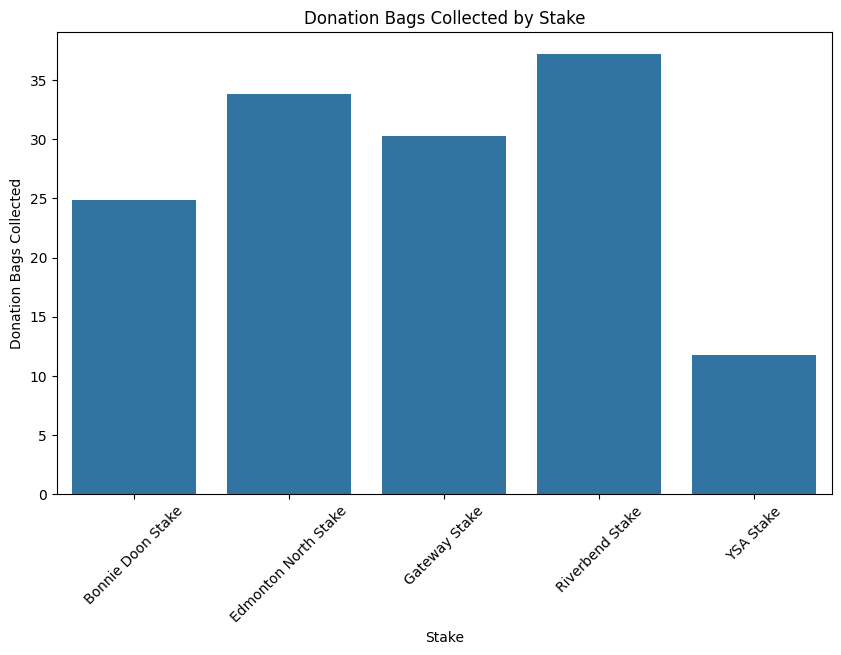

In [72]:

# Visualizations (customize as needed)
# Example: Bar plot of Stake vs. Donation Bags Collected
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Stake', y='Donation Bags Collected', ci=None)
plt.title('Donation Bags Collected by Stake')
plt.xlabel('Stake')
plt.ylabel('Donation Bags Collected')
plt.xticks(rotation=45)
plt.show()


<ipython-input-73-d50ba90e4bce>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Neighbourhood', y='Donation Bags Collected', ci=None)


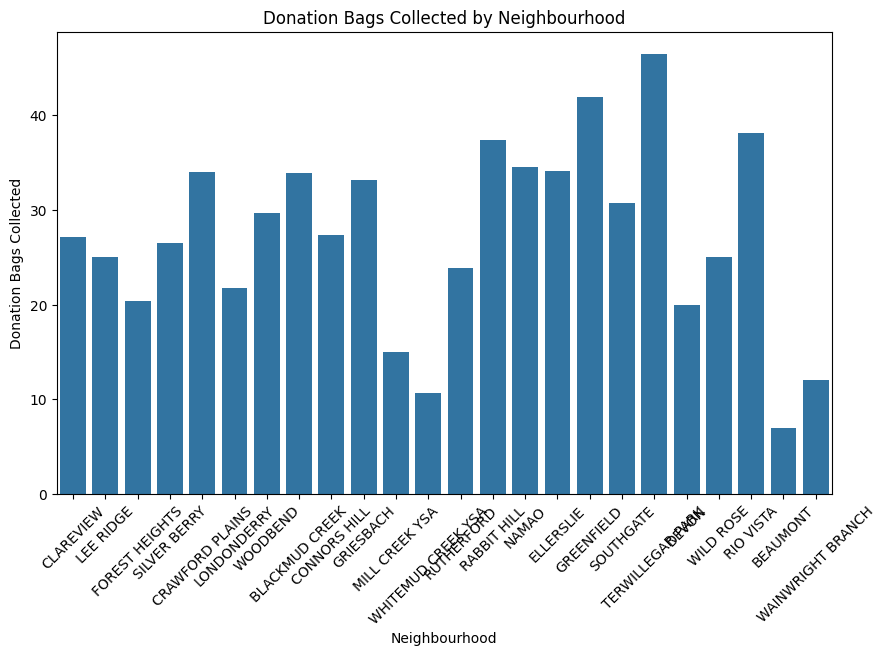

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Neighbourhood', y='Donation Bags Collected', ci=None)
plt.title('Donation Bags Collected by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Donation Bags Collected')
plt.xticks(rotation=45)
plt.show()

<ipython-input-74-58b7575ec49a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Ward/Branch', y='Donation Bags Collected', ci=None)


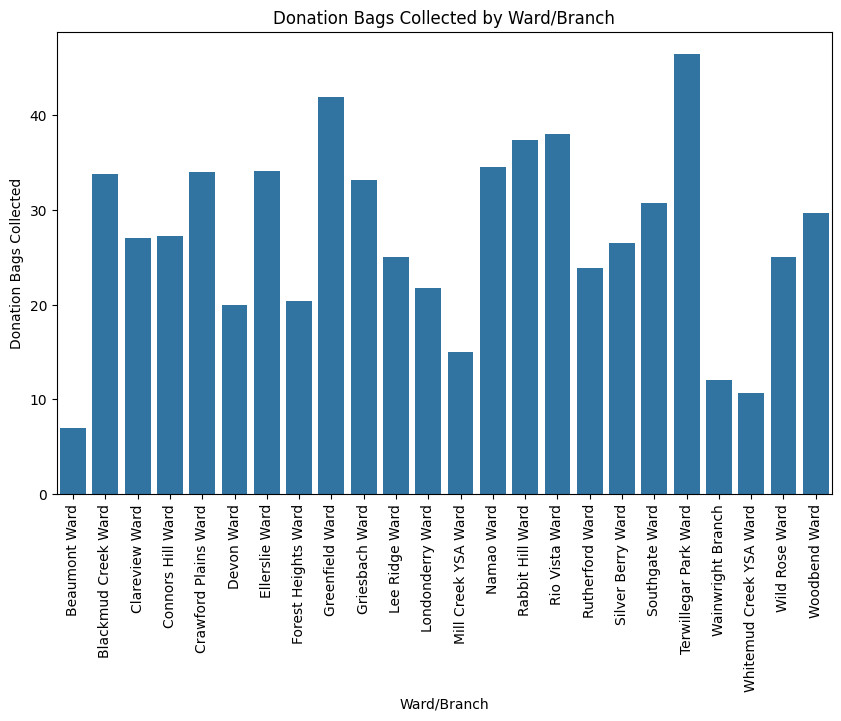

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Ward/Branch', y='Donation Bags Collected', ci=None)
plt.title('Donation Bags Collected by Ward/Branch')
plt.xlabel('Ward/Branch')
plt.ylabel('Donation Bags Collected')
plt.xticks(rotation=90)
plt.show()

<ipython-input-75-e88f0be41d07>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= merged_df, x='Neighbourhood', y='Assessed Value', ci=None)


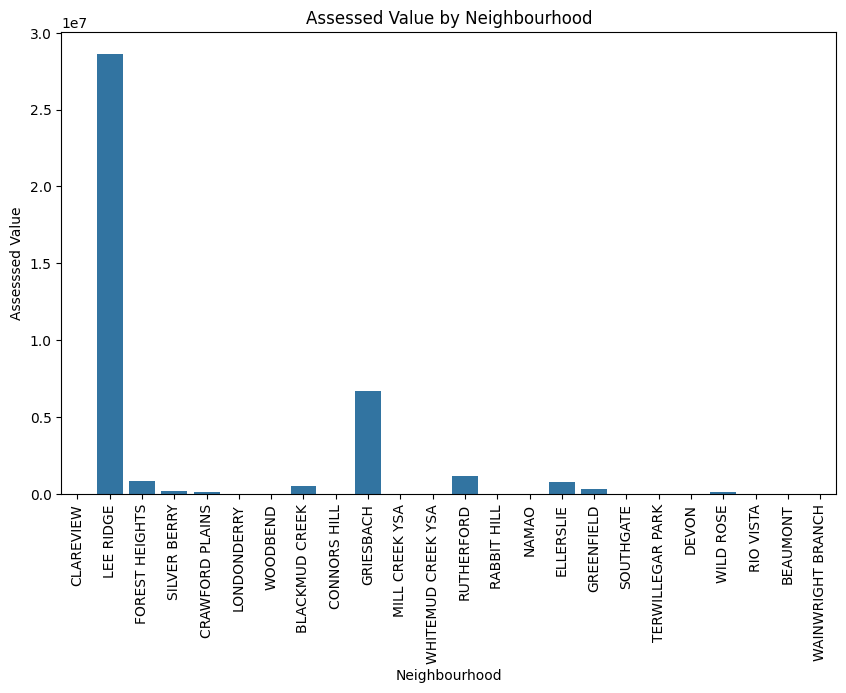

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(data= merged_df, x='Neighbourhood', y='Assessed Value', ci=None)
plt.title('Assessed Value by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Assesssed Value')
plt.xticks(rotation=90)
plt.show()

<ipython-input-76-46a9778c3b7e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= merged_df, x='Stake', y='Assessed Value', ci=None)


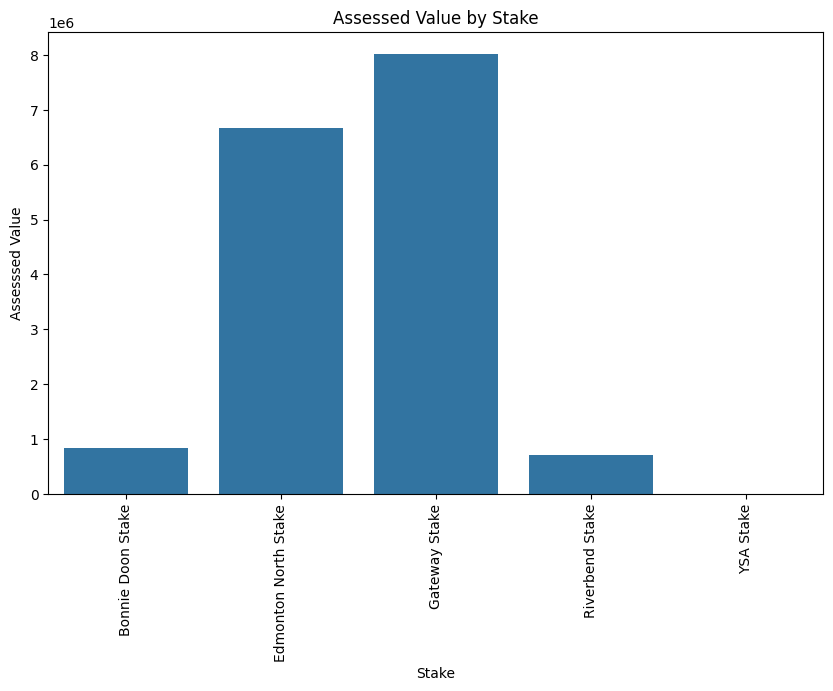

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(data= merged_df, x='Stake', y='Assessed Value', ci=None)
plt.title('Assessed Value by Stake')
plt.xlabel('Stake')
plt.ylabel('Assesssed Value')
plt.xticks(rotation=90)
plt.show()

<ipython-input-77-3a13cb0f1a51>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= merged_df, x='Ward/Branch', y='Assessed Value', ci=None)


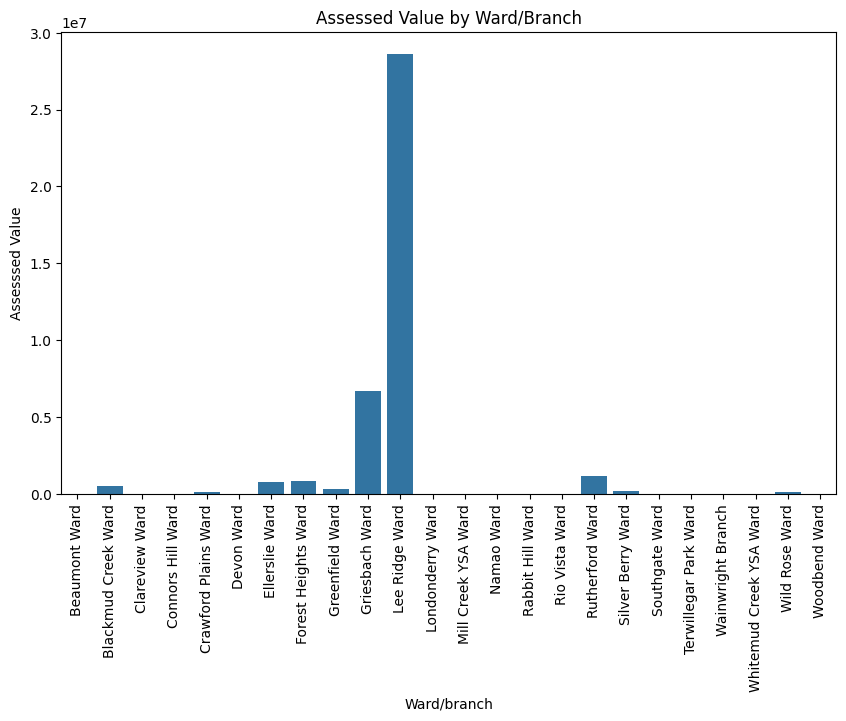

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(data= merged_df, x='Ward/Branch', y='Assessed Value', ci=None)
plt.title('Assessed Value by Ward/Branch')
plt.xlabel('Ward/branch')
plt.ylabel('Assesssed Value')
plt.xticks(rotation=90)
plt.show()

#AutoEDA

In [78]:
!pip install pandas-profiling[notebook,html]

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 68.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=b3282d5284ae864c18e206dea5945cb04292af2ccfc27e5b18249a9346c991db
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [79]:
import pandas as pd
from ydata_profiling import ProfileReport # Use ydata_profiling instead of pandas_profiling
from ydata_profiling.utils.cache import cache_file # Use ydata_profiling instead of pandas_profiling

In [80]:
# import pandas as pd
# import pandas_profiling
# from pandas_profiling import ProfileReport
# from pandas_profiling.utils.cache import cache_file
# pandas_profiling.__version__


# Generate Report

In [81]:
profile = ProfileReport(data, title="Edmonton Food Drive", html={'style': {'full_width': True}}, sort=None)

In [82]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

# Interview Readiness

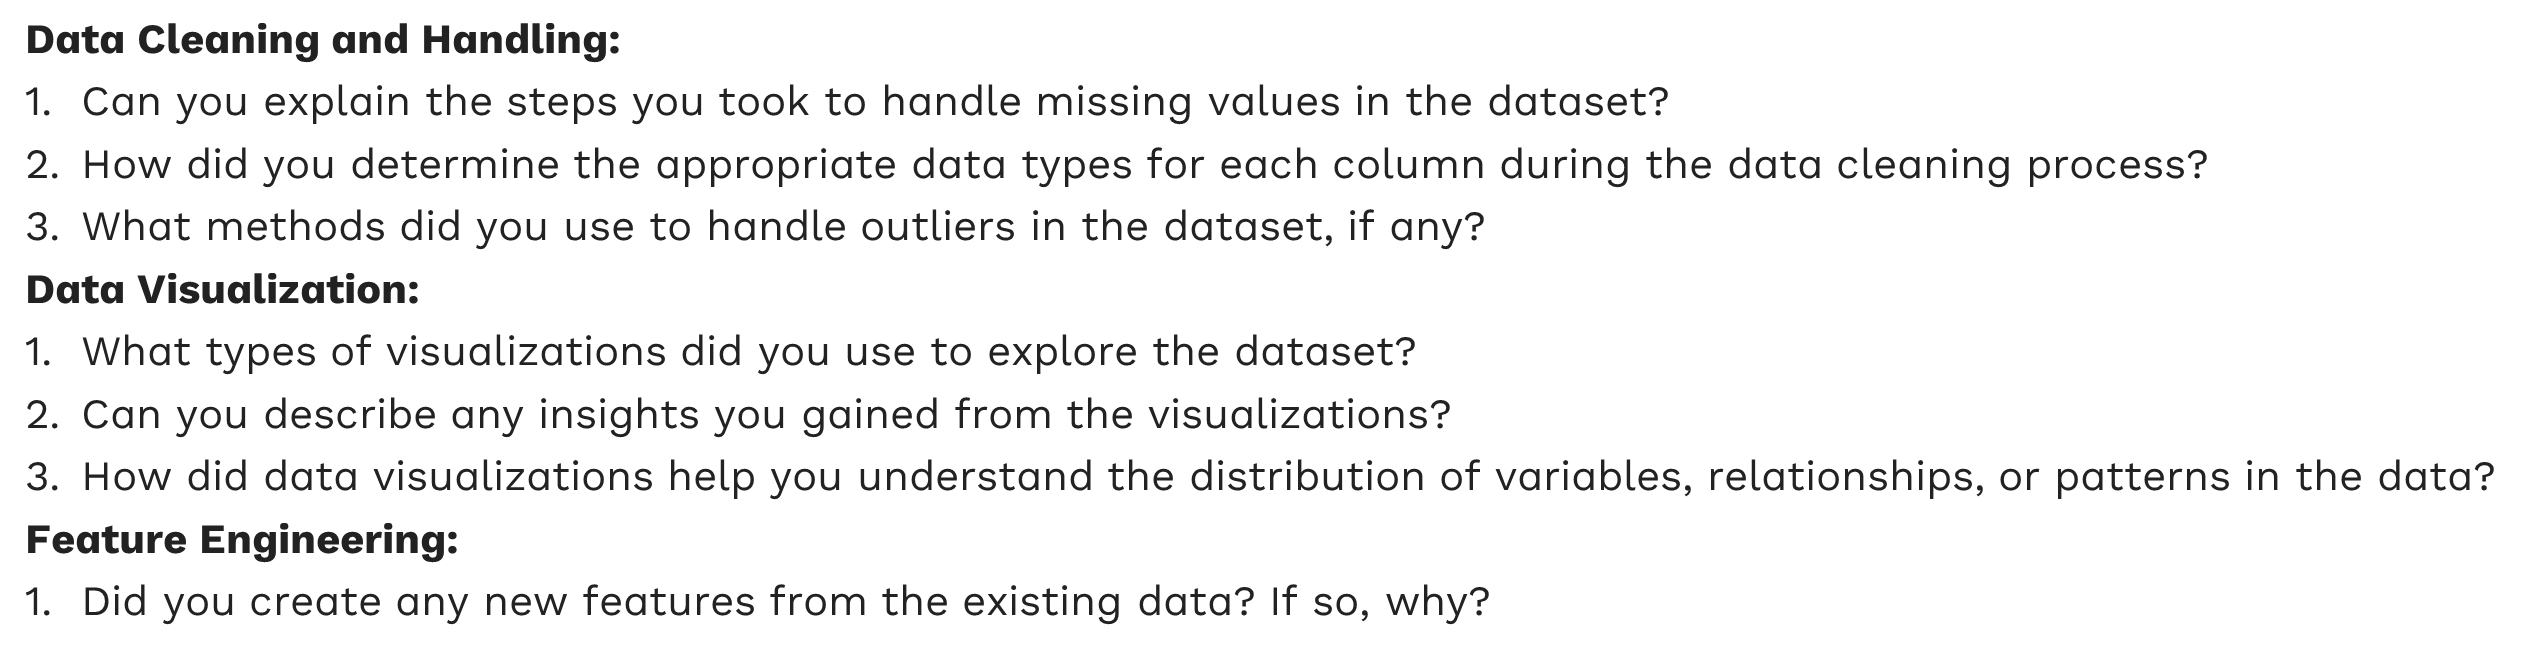

Data Cleaning and handling
1. We did not have any missing values in most of the data that was important but there were some missing values in number of routes completed. As that question was only answered by the people who completed more than one route so this made it obvious that all the other empty cells should be filled by 1 because all others completed just one route. Additional routes have alot of missing values but we can neither fill them nor they are of any use to us. Email column had alot of missing values so it was deleted.

2. I changed the data type of some column. I changed data type to cattegory for columns Time spent collecting data, Location, How did you receive form, Stake and Ward/Branch. these were changed to categories because these only had specific answers. The answeres cannot be anything else other than that. To be more clear, for how did you receive the form , answer can either be in person or email, it can be nothing else as only these option were given to choose. for the same reason the category datatype was applied to others. Some columns were changed to int data type because the answers can never be float. Columns like Routes completed, because one cannot complete 1.5 route or 3.4. It would obviously be a whole number. After removing outliers Number of youth volunteers and Donation bags collected change to float. So these were again converted into int.

3. There was one outlier in number of youth volunters outliers where someone accidentally added same value in this and numbers of doors in route (165). This is just an assumption that it is a mistake because it is what I analyzed. To remove this outlier we replaced it with mean instead of replacing it with some of our own number. We first found outliers by setting the lower and upper threshold. Then replaced the one which was completely different and unaccepted and did not change others to be get more realistic observation. Same thing was done with outliers in donation bags collected. There were 19 outliers but only 3 were replaced because when we collected data it was observed that there were few donation bags but for some routes there were more. So, when we set threshold it gives us alot more outliers than we thought but we cannot replace all of them because they can be realistic. Only the number greater than or equal to 230 were replaced by mean.

Data Visualization

1. To explore the data and have clear observations we made bar graphs to understand the number of donations on the basis of neighbourhood, Ward and stake. The bar graph clearly depicts which Of then have highest and lowest number of donation bags. for the same reason we made bargraphs to see the highest and lowest assessed values of neighbourhoods, Wardand stake. we can compare those bar graphs to see how assessed value is related to number of donation bags.

2. From the visualizations, even if the count of gateway stake was highest, the highest count of donation bags was from Riverbend stake. This gives and idea that more people volunteered at gateway stake but the donations were less as compared to Riverbend where donation bags were more. If we compare the assessed value and donation bags by skate then it can be clearly seen that gateway stake have more assessed value than Riverbend and Edmonton North stake but both of these stakes have higher count of donation bags as comparedt to gateway stake. The assessed value of Riverbend stakeis really low but count of donation bags us relatively high.

3. Data visualizations make it easier to understand information by showing clear patterns and connections between different things. Histograms and bar graphs highlight the highest and lowest values< to be more clear, we can see that which stake, neighbourhood and Ward have highest and lowest count of donation bags and assessed value. Scatterplots and heatmaps show how two things are related. Scatterplots or line graphs help us see how one thing changes when another thing changes. Heatmaps also show how strong the relationship is and whether it's positive or negative. From heat map we can tell which variable decrease or increase in relation to like, number of donation bags is positively related to doors in route.

Feature Engineering.

1. We did not create any new feature but we did merge data of Food drive to the peoperty assesment data to get the Assessed values on the basis of neighbourhood.But we did in last create a new feature neighbourhood where we remove the 'ward' from the cells of Ward/Branch column. We get a new column of neighbourhood which vcan be used to merge the data of food drive and property assessment.

# Other Visualizations


1. **Bar Chart for Bags Collected:**
   - Display the total number of bags collected for each region, ward, or route. This helps in comparing collection efficiency across different areas.

2. **Pie Chart for Bags Collected by Region:**
   - Show the percentage distribution of bags collected across different regions. Each slice represents a region, and the size of the slice indicates the proportion of bags collected.

3. **Line Chart for Time Spent:**
   - Plot the average time spent on each route over time. This chart can help identify trends in the time taken for collections.

4. **Stacked Bar Chart for Bags Collected by Ward:**
   - Display the number of bags collected in each ward, with different colors representing different routes within the ward. This helps in understanding route-wise collections within a ward.

5. **Bubble Chart for Time Spent vs. Bags Collected:**
   - Represent each route as a bubble where the X-axis is the time spent, the Y-axis is the bags collected, and the size of the bubble represents the number of collections. This chart can reveal efficiency outliers.

6. **Heatmap for Bags Collected and Time Spent:**
   - Create a heatmap where the X-axis represents time spent, the Y-axis represents routes, and the color intensity represents the number of bags collected. This visualization helps identify patterns based on both time spent and bags collected.

7. **Bar Chart for Average Time Spent by Ward:**
   - Display the average time spent on routes within each ward. This can help identify wards with particularly time-consuming routes.

8. **Box Plot for Time Spent:**
   - Use a box plot to show the distribution of time spent on different routes. This visualization provides insights into the variability in collection times.

9. **Donut Chart for Bags Collected by Route:**
   - Display the proportion of bags collected by different routes within a ward. The inner circle represents the total bags collected in the ward, and the outer ring shows the distribution by routes.

10. **Choropleth Map for Bags Collected by Region:**
    - Use a map visualization where regions are shaded based on the total bags collected. Darker shades represent higher collections, providing a geographic perspective

<ipython-input-83-c0269e9668ea>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = merged_df, x = 'Ward/Branch', y = 'Donation Bags Collected',ci= None)


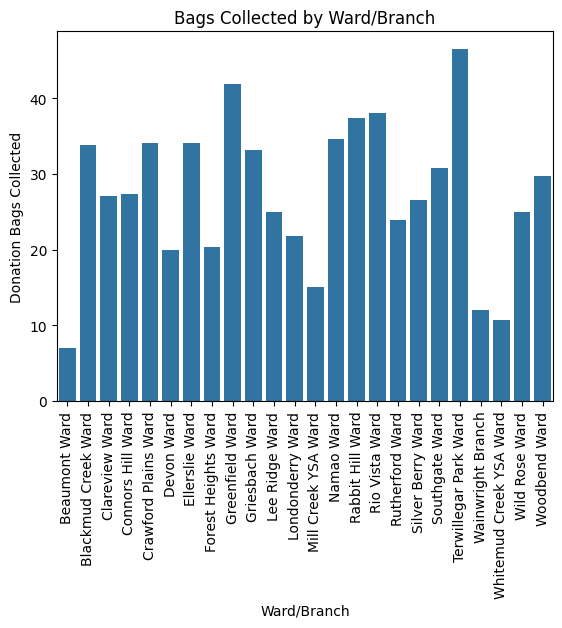

In [83]:
sns.barplot(data = merged_df, x = 'Ward/Branch', y = 'Donation Bags Collected',ci= None)
plt.xticks(rotation = 90)
plt.title('Bags Collected by Ward/Branch')
plt.xlabel('Ward/Branch')
plt.ylabel('Donation Bags Collected')
plt.show()

<ipython-input-84-2d098147dbc2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ward_bags = data.groupby('Ward/Branch')['Donation Bags Collected'].sum()


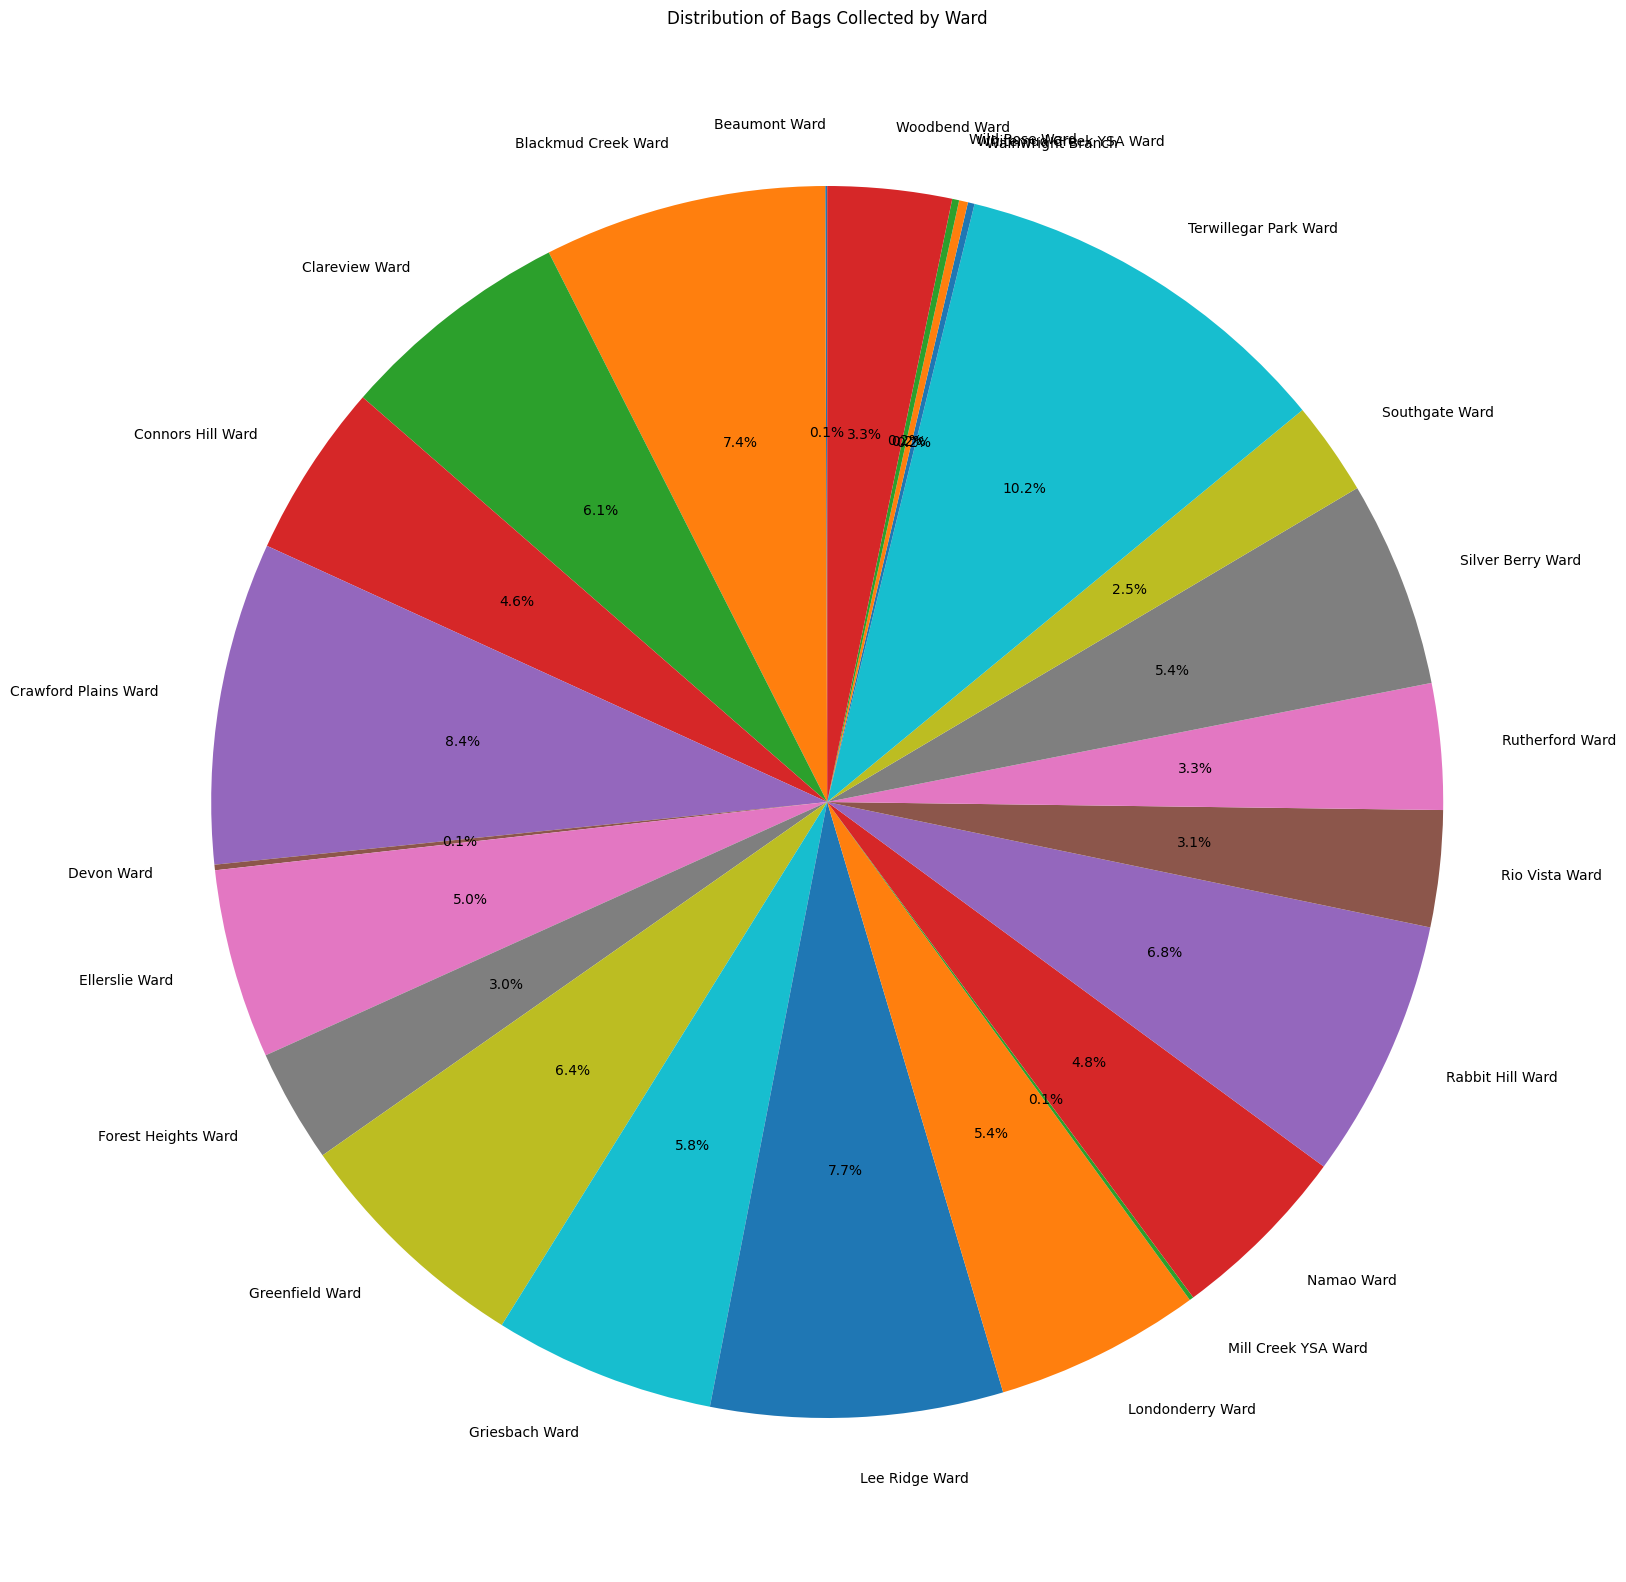

In [84]:
ward_bags = data.groupby('Ward/Branch')['Donation Bags Collected'].sum()
plt.figure(figsize=(20, 20))
plt.pie(ward_bags, labels=ward_bags.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Bags Collected by Ward')
plt.show()